# Postwork 8

 ## Nombre del Postwork: Procesamiento de Lenguaje Natural

### OBJETIVO 

- Aplicar los conceptos de Procesamiento de Lenguaje Natural aprendidos en esta sesión a nuestro proyecto

#### REQUISITOS 

- Tener un dataset limpio que contenga una columna con datos no estructurados.

> En caso de que tu dataset no contenga datos no estructurados, date una vuelta por [Kaggle](https://kaggle.com) y busca algún dataset apropiado. Lo que nos interesa en que practiques estas herramientas durante la clase para que puedas expresarle tus dudas a la experta.

#### DESARROLLO

Realiza los siguientes procedimientos en caso de que apliquen a tu dataset:

1. Utiliza patrones Regex para limpiar tus datos estructurados
2. Dado que debes de conocer bien tu dataset (excepto si es un nuevo dataset que buscaste para este Postwork), es probable que tengas una idea de las palabras que son relevantes para tu tema. Genera un objeto Text con la librería nltk y explora los contextos de las palabras que elegiste. Utiliza el método `similar` para obtener palabras que tengan contextos similares a las palabras originales. Puede que descubras nuevas palabras que tengan relevancia para tu proyecto.
3. Utiliza el objeto FreqDist de nltk para hacer análisis estadístico de tu dataset. Explora las palabras y los bigramas más comunes de tu dataset.
4. Realiza visualizaciones de tus conteos de frecuencias utilizando gráficas de barras.
5. Realiza visualizaciones de las distribuciones de frecuencias de las longitudes de las palabras o de las oraciones.
6. Realiza nubes de palabras para detectar los temas más importantes de tu conjunto de datos.
7. Haz un análisis de sentimientos de tu conjunto de datos, de preferencia utilizando una variable categórica para segmentar tus datos y poder comparar las distribuciones de polaridades entre cada segmento.

¡Mucha suerte!

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
nltk.download('punkt');
nltk.download('stopwords');


[nltk_data] Downloading package punkt to /home/alan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/alan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
#df = pd.read_csv('/work/B2-Analisis-de-Datos-con-Python-2020-2021-Santander/Sesion-07/Top 500 Songs.csv')
df = pd.read_csv('Top_500_Songs.csv',encoding='latin-1')
df.head()

,title,description,appears on,artist,writers,producer,released,streak,position
0,Like a Rolling Stone,"""I wrote it. I didn't fail. It was straight,"" ...",Highway 61 Revisited (Columbia),Bob Dylan,Dylan,Tom Wilson,"July, 1965",12 weeks,No. 2
1,(I Can't Get No) Satisfaction',"""It's the riff heard round the world,"" says St...",Out of Our Heads (ABKCO),The Rolling Stones,"Mick Jagger, Keith Richards",Andrew Loog Oldham,"May, 1965",14 weeks,No. 1
2,Imagine,"John Lennon wrote ""Imagine,"" his greatest musi...",Imagine (Capitol/Apple),John Lennon,John Lennon,"Lennon, Phil Spector, Yoko Ono","October, 1971",9 weeks,No. 3
3,What's Going On,"""What's Going On"" is an exquisite plea for pea...",What's Going On (Tamla),Marvin Gaye,"Gaye, Renaldo Benson, Al Cleveland",Gaye,"Feb, 1971",13 weeks,No. 2
4,Respect,"Otis Redding wrote ""Respect"" and recorded it f...",I Never Loved a Man the Way I Love You (Atlantic),Aretha Franklin,Otis Redding,Jerry Wexler,"April, 1967",12 weeks,No. 1


In [20]:
grouped_by_title = df.groupby('title')['description'].last()
grouped_by_title[3]

'Haley began his career as a country yodeler before converting to rock & roll. "Clock" was a modest hit until it played during the opening credits of The Blackboard Jungle and shot to Number One.'

In [21]:
grouped_by_title = grouped_by_title.dropna()
grouped_by_title = grouped_by_title.str.lower()
grouped_by_title = grouped_by_title.str.strip()
grouped_by_title = grouped_by_title.str.replace('[^\w\s]', '')  
grouped_by_title = grouped_by_title.str.replace('\d|\\n', '')
#grouped_by_title = grouped_by_title.str.replace('\d', '')
#grouped_by_title = grouped_by_title.str.replace('\\n', '')
grouped_by_title

/tmp/ipykernel_8760/1999385890.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  grouped_by_title = grouped_by_title.str.replace('[^\w\s]', '')
/tmp/ipykernel_8760/1999385890.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  grouped_by_title = grouped_by_title.str.replace('\d|\\n', '')


title
(Dont Fear) the Reaper                this long island bands death trip was picked b...
(I Can't Get No) Satisfaction'        its the riff heard round the world says steve ...
(Sittin' on) the Dock of the Bay      a few days after his starmaking set at the mon...
(Were Gonna) Rock Around the Clock    haley began his career as a country yodeler be...
(Whats So Funny About) Peace          whatâs so funny was written by lowe costelloâs...
                                                            ...                        
You've Lost That Lovin' Feelin''      spector was conducting the musicians for a ron...
Young Americans                       in  bowie traded his glammedout ziggy stardust...
Young Blood                           the coasters were named after the west coast h...
Your Cheatin Heart                    legend has it that this song came to williams ...
Ziggy Stardust                        i wasnât at all surprised ziggy stardust made ...
Name: description, Length:

In [22]:
grouped_by_title[3]

'haley began his career as a country yodeler before converting to rock  roll clock was a modest hit until it played during the opening credits of the blackboard jungle and shot to number one'

In [23]:
tokenized = grouped_by_title.apply(nltk.word_tokenize)

In [24]:
all_words = tokenized.sum()
text = nltk.Text(all_words)

In [25]:
text.concordance('world', lines=20)

Displaying 20 of 21 matches:
ternity its the riff heard round the world says steve van zandt guitarist for t
 england on the six hour tv show our world a satellite broadcast seen by millio
e message they wanted to send to the world it was for love and bloody peace rin
d it almost singlehandedly created a world beyond the charts the kickoff chant 
 like a gunshot reeves reinvents the world as a giant block party in dylan told
s also the song in which he told the world like it or not rock roll is here to 
ine his greatest musical gift to the world one morning early in in his bedroom 
ite grand piano now known around the world from films and photographs of the se
 plainspoken faith in the power of a world united in purpose to repair and chan
s saying that his room was his whole world said usher who wrote the lyrics base
wn sideman bobby byrd made the whole world take notice valens version of this t
ed after the call signal of the bbcs world service broadcasts the title alarm o
bel owner g

In [26]:
text.similar('hate',num=30)

ewf


In [27]:
text.similar('love',num=30)

rock it sound version drug day degree cynicism his on houseboat
california producer costello brandnew piano like punks revolution new
singles real big suggested soul what mccartney bed session summer


In [28]:
text.similar('drug',num=30)


rock love cynicism california producer brandnew new big bed summer
pepsi sound elvis debt seven campaign perfect plastic alias
tuttifrutti arranging hurt


In [29]:
text.common_contexts(['love', 'man'])

a_in


In [30]:
len(set(text))

6057

In [31]:
len(text)

30539

In [32]:
text.collocations()

rolling stone; new york; number one; told rolling; rock roll; muscle
shoals; san francisco; high school; hound dog; years later; bob dylan;
los angeles; beach boys; ringo starr; first single; john lennon;
million copies; biggest hit; chuck berry; yoko ono


3 .

In [33]:
freq_dist = nltk.FreqDist(all_words)
freq_dist.most_common(20)

[('the', 1961),
 ('a', 903),
 ('of', 652),
 ('to', 624),
 ('and', 604),
 ('in', 583),
 ('was', 483),
 ('it', 419),
 ('on', 346),
 ('for', 301),
 ('he', 299),
 ('song', 292),
 ('his', 289),
 ('with', 283),
 ('said', 250),
 ('i', 240),
 ('that', 238),
 ('this', 185),
 ('by', 178),
 ('at', 168)]

In [34]:
english_stop_words = stopwords.words('english')

all_words_except_stop_words = [word for word in all_words if word not in english_stop_words]

freq_dist_no_stop_words = nltk.FreqDist(all_words_except_stop_words)

In [43]:
freq_dist_no_stop_words.most_common(20)

[('song', 292),
 ('said', 250),
 ('one', 134),
 ('â', 131),
 ('first', 121),
 ('hit', 92),
 ('like', 89),
 ('wrote', 88),
 ('new', 83),
 ('guitar', 72),
 ('single', 67),
 ('recorded', 63),
 ('band', 62),
 ('songs', 58),
 ('lyrics', 57),
 ('got', 57),
 ('rock', 52),
 ('later', 52),
 ('record', 52),
 ('came', 51)]

In [36]:
print(f'{(100 * freq_dist_no_stop_words["said"] / len(all_words_except_stop_words)):.3f}%')



1.399%


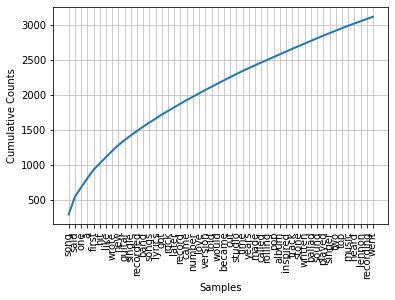

In [37]:
freq_dist_no_stop_words.plot(50, cumulative=True);


In [38]:
# Palabras que sólo aparecen una sola vez

freq_dist_no_stop_words.hapaxes()[:20]

['ghostly',
 'cowbell',
 'reaper',
 'chills',
 'halloween',
 'bonus',
 'points',
 'crackpot',
 'romeo',
 'juliet',
 'eternity',
 'round',
 'zandt',
 'examples',
 'influencing',
 'tradition',
 'starmaking',
 'houseboat',
 'sausalito',
 'boat']

4 .

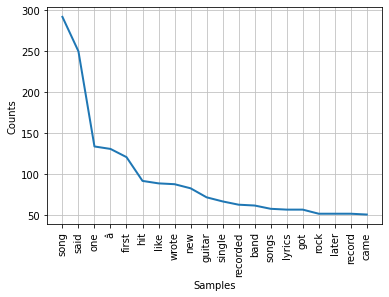

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [39]:
freq_dist_no_stop_words.plot(20)

/home/alan/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


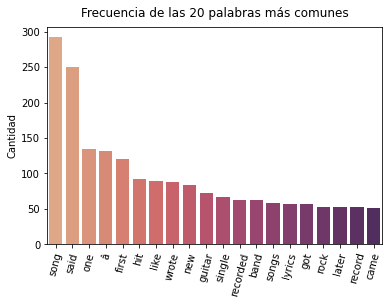

In [54]:
most_common_20 = np.array(list(map(lambda x: list(x), freq_dist_no_stop_words.most_common(20))))

# conversión a tipo númerico
most_common_20_cant = []
most_common_20_word =[]
for i,j in most_common_20:
    most_common_20_cant.append(int(j))
    most_common_20_word.append(i)

fig = plt.figure()
ax = fig.add_subplot()

sns.barplot(most_common_20[:, 0], most_common_20_cant, ax=ax, palette='flare');
ax.set_title('Frecuencia de las 20 palabras más comunes', pad=10)
ax.set_ylabel('Cantidad')
ax.tick_params(axis='x', rotation=75)

5 .

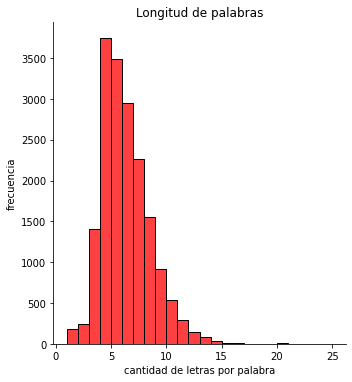

In [41]:
len_words = [len(n) for n in all_words_except_stop_words]

sns.displot(len_words, binwidth=1,kde=False, color='r')
plt.title('Longitud de palabras');
plt.xlabel('cantidad de letras por palabra');
plt.ylabel('frecuencia');

6 .

In [51]:
all_words_except_stop_words[:50]

['long',
 'island',
 'bands',
 'death',
 'trip',
 'picked',
 'rolling',
 'stone',
 'critics',
 'best',
 'rock',
 'single',
 'ghostly',
 'guitars',
 'cowbell',
 'reaper',
 'added',
 'chills',
 'horror',
 'flicks',
 'halloween',
 'stand',
 'bonus',
 'points',
 'crackpot',
 'theology',
 'men',
 'women',
 'every',
 'day',
 'join',
 'romeo',
 'juliet',
 'eternity',
 'riff',
 'heard',
 'round',
 'world',
 'says',
 'steve',
 'van',
 'zandt',
 'guitarist',
 'e',
 'street',
 'band',
 'one',
 'earliest',
 'examples',
 'dylan']

(-0.5, 399.5, 199.5, -0.5)

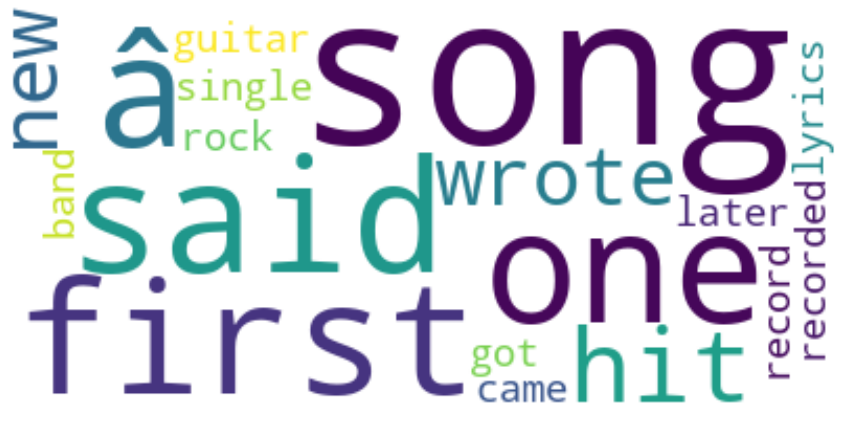

In [55]:
most_common_50 = np.array(list(map(lambda x: list(x), freq_dist_no_stop_words.most_common(20))))

#wordcloud = WordCloud(max_font_size=100,background_color='white').generate(' '.join(all_words_except_stop_words[:50]))
wordcloud = WordCloud(max_font_size=100,background_color='white').generate(' '.join(most_common_20_word))
plt.figure(figsize=(15,15))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')